In [1]:
cd ../..

/Users/joeranbosma/stack/Projects/M5Forecast


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, gc
import matplotlib.pyplot as plt

import lightgbm as lgb

# own imports
from evaluation import Referee, load_data, select_dates, select_day_nums
from train import get_chronological_train_val_split, get_train_val_slit, train_lightgbm_model, lightgbm_pred_to_df

# Setup file paths
data_dir = 'data/'
os.environ['DATA_DIR'] = data_dir
sub_dir = 'submissions_uncertainty/'
plt.rcParams['font.size'] = 13

# Hardcode requested quantiles
quantiles = [0.005, 0.025, 0.165, 0.25, 0.5, 0.75, 0.835, 0.975, 0.995]

# Predict LightGBM - multiple levels - 5-fold chronological cross-validation

In [18]:
model_dir = 'models/uncertainty/final/run2/'
lgb_dir = model_dir + '../run1/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

## Predict validation sets

In [5]:
level = 3
fold = 3
lag = 1
# read
train, val, test, features = get_train_val_slit(level, fold, prediction_lag=lag)
model = lgb.Booster(model_file=model_dir + "lightgbm-level{}-lag{}-fold{}.txt".format(level, lag, fold))

# predict
y_pred = model.predict(val[features])

Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000


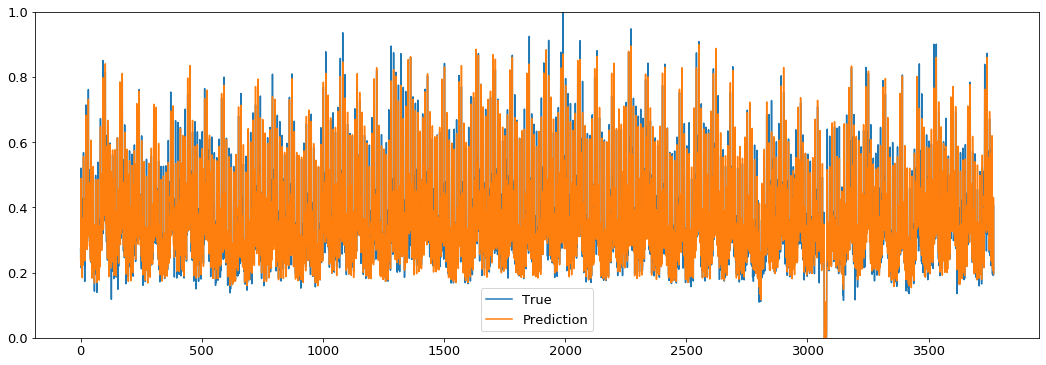

In [6]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax.plot(val['demand'].values, label="True")
ax.plot(y_pred, label="Prediction")
ax.legend()
ax.set_ylim(0, 1)
plt.show()

In [7]:
y_pred_df = lightgbm_pred_to_df(y_pred, val)
y_pred_df

,id,date,lgb_pred,demand
0,CA_1_X,2013-02-21,0.250180,0.273193
1,CA_1_X,2013-02-22,0.223511,0.221680
2,CA_1_X,2013-02-23,0.488410,0.520020
3,CA_1_X,2013-02-24,0.241067,0.213745
4,CA_1_X,2013-02-25,0.219335,0.245483
5,CA_1_X,2013-02-26,0.297165,0.321045
6,CA_1_X,2013-02-27,0.286377,0.306396
7,CA_1_X,2013-02-28,0.184269,0.209839
8,CA_1_X,2013-03-01,0.365967,0.427002
9,CA_1_X,2013-03-02,0.222150,0.245361


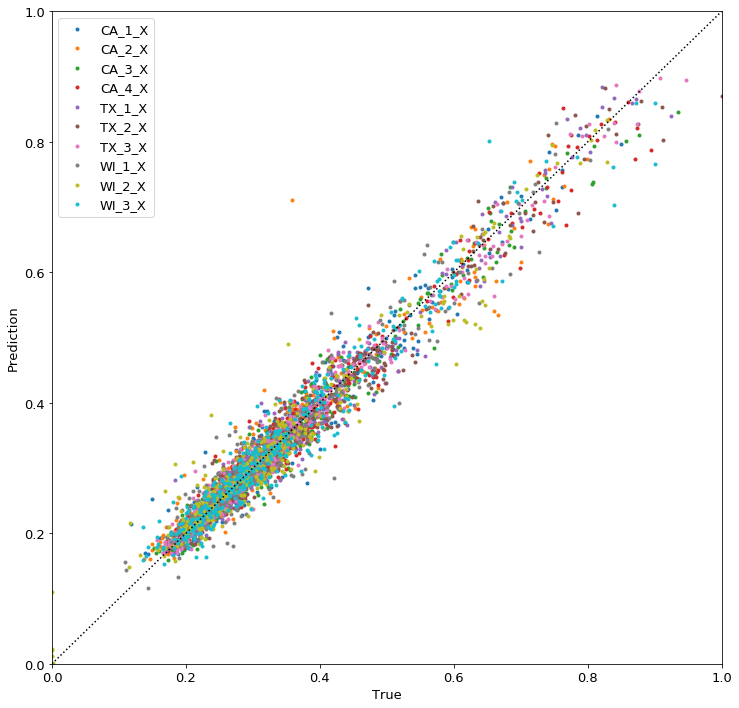

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 12))
for store_id in y_pred_df.id.unique():
    df = y_pred_df[y_pred_df.id == store_id]
    ax.plot(df['demand'].values, df['lgb_pred'].values, ".", label=store_id)
ax.plot(np.linspace(0, 1), np.linspace(0, 1), ':', color='k')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("True")
ax.set_ylabel("Prediction")
ax.legend()
plt.show()

## All levels

In [17]:
for prediction_lag in [28, 21, 14, 7, 3, 2, 1]:
    print(">>>>>>>>>>> Starting lag {} <<<<<<<<<<".format(lag))
    for level in range(1, 12+1):
        if lag <= 21 and level >= 10:
            continue
        
        print("========== Starting level {} ==========".format(level))
        pred_list = []
        for fold in range(1, 1+5):
            print("== Starting fold {} ==".format(fold))
            # read
            train, val, test, features = get_train_val_slit(level, fold, prediction_lag=lag, verbose=False)
            model = lgb.Booster(model_file=lgb_dir + "lightgbm-level{}-lag{}-fold{}.txt".format(level, lag, fold))

            # predict
            y_pred = model.predict(val[features])
            y_pred_df = lightgbm_pred_to_df(y_pred, val)
            pred_list.append(y_pred_df)

            # predict test set with model trained on fold 5 (i.e. with validation set longest ago)
            if fold == 5:
                # predict
                y_pred = model.predict(test[features])
                y_pred_df = lightgbm_pred_to_df(y_pred, test)
                pred_list.append(y_pred_df)

        pred_df = pd.concat(pred_list)
        pred_df.to_csv(model_dir + "predictions_level{}_lag{}.csv".format(level, lag))

>>>>>>>>>>> Starting lag 3 <<<<<<<<<<
========== Starting level 1 ==========
== Starting fold 1 ==


LightGBMError: Could not open models/uncertainty/final/run2/lightgbm-level1-lag3-fold1.txt

## Evaluation set

In [36]:
fold = 5
from preprocess import get_features

for prediction_lag in [28, 21, 14, 7, 3, 2, 1]:
    print(">>>>>>>>>>> Starting lag {} <<<<<<<<<<".format(prediction_lag))
    predictions = {}
    for level in range(1, 12+1):
        if prediction_lag <= 21 and level >= 10:
            continue
        
        print("========== Starting level {} ==========".format(level))
        
        fn = data_dir + 'eval_prep/level_{}_simple_fe_2016_04_24_2016_05_22_normalised_demand_lag_{}.pickle'.format(
                        level, prediction_lag)
        
        # check if already preprocessed
        assert os.path.exists(fn), "Run preprocess_validation_features.ipynb first"
        
        # read data
        data = pd.read_pickle(fn)
        
        # get features
        features = get_features(level, prediction_lag, sell_price_features=('sell_price' in data.columns))
        
        # read model
        fn = lgb_dir + "lightgbm-level{}-lag{}-fold{}.txt".format(level, prediction_lag, fold)
        model = lgb.Booster(model_file=fn)

        # predict
        y_pred = model.predict(data[features])
        y_pred_df = lightgbm_pred_to_df(y_pred, data)
        # save
        y_pred_df.to_csv(model_dir + "eval_predictions_level{}_lag{}.csv".format(level, prediction_lag))

>>>>>>>>>>> Starting lag 28 <<<<<<<<<<
========== Starting level 1 ==========
========== Starting level 2 ==========
========== Starting level 3 ==========
========== Starting level 4 ==========
========== Starting level 5 ==========
========== Starting level 6 ==========
========== Starting level 7 ==========
========== Starting level 8 ==========
========== Starting level 9 ==========
========== Starting level 10 ==========
========== Starting level 11 ==========
========== Starting level 12 ==========
>>>>>>>>>>> Starting lag 21 <<<<<<<<<<
========== Starting level 1 ==========
========== Starting level 2 ==========
========== Starting level 3 ==========
========== Starting level 4 ==========
========== Starting level 5 ==========
========== Starting level 6 ==========
========== Starting level 7 ==========
========== Starting level 8 ==========
========== Starting level 9 ==========
>>>>>>>>>>> Starting lag 14 <<<<<<<<<<
========== Starting level 1 ==========
========== Starting le